In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [28]:


from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz  

In [29]:
df=pd.read_csv("heart_v2.csv")

In [30]:
df.head(5)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [31]:
df.tail(5)

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [33]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


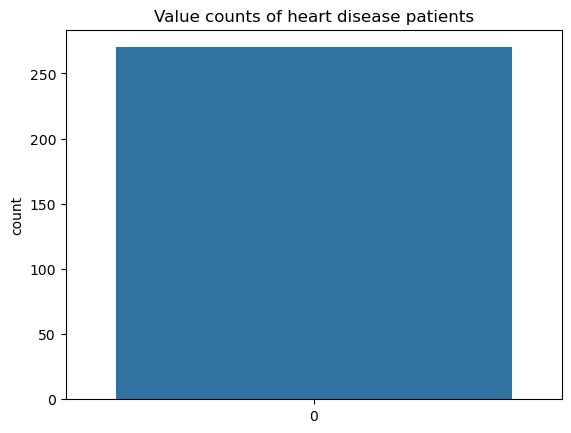

In [34]:
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [42]:
X=df.drop(columns='heart disease',axis=1)
y=df['heart disease']

In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [46]:
classifier_rf.oob_score_

0.656084656084656

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

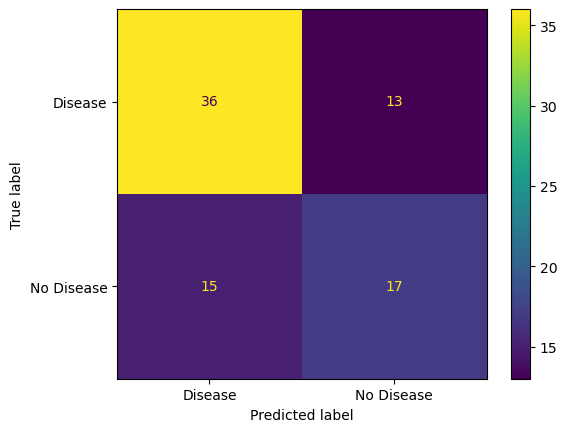

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_pred = classifier_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Disease', 'No Disease']).plot()


In [73]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [74]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy : 0.654320987654321
Precision: 0.5666666666666667
Recall: 0.53125
F1_Score: 0.5483870967741935


In [75]:
feature_names=list(X.columns)


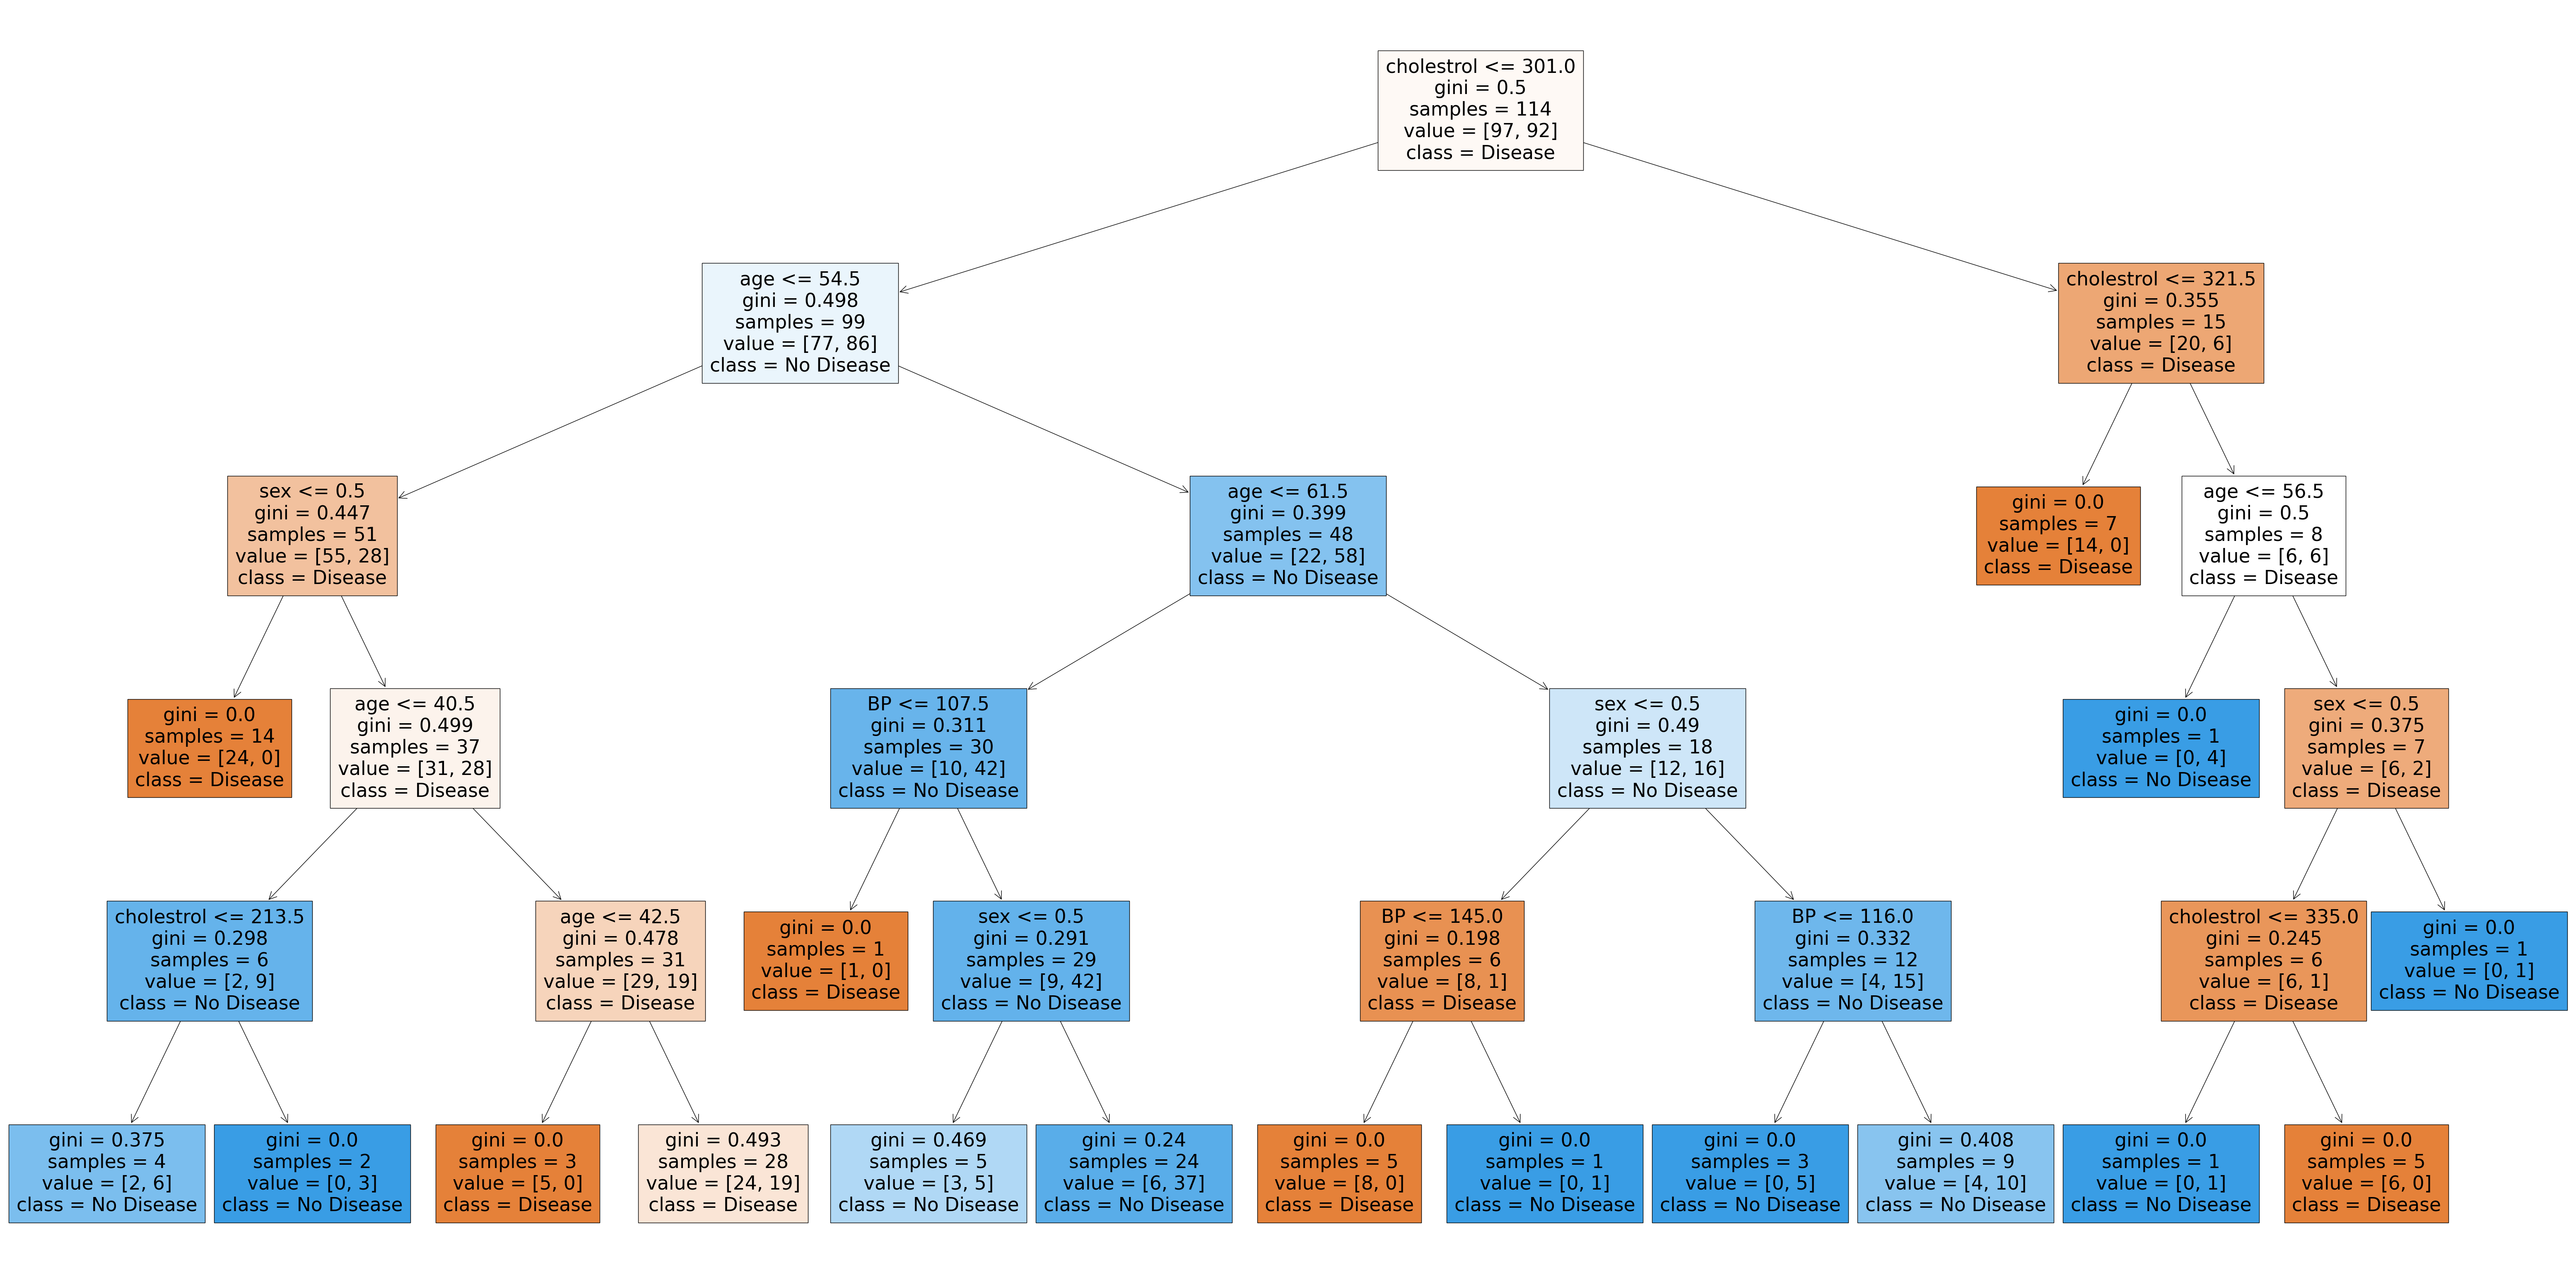

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names=list(X.columns), class_names=['Disease', 'No Disease'], filled=True)
plt.show()


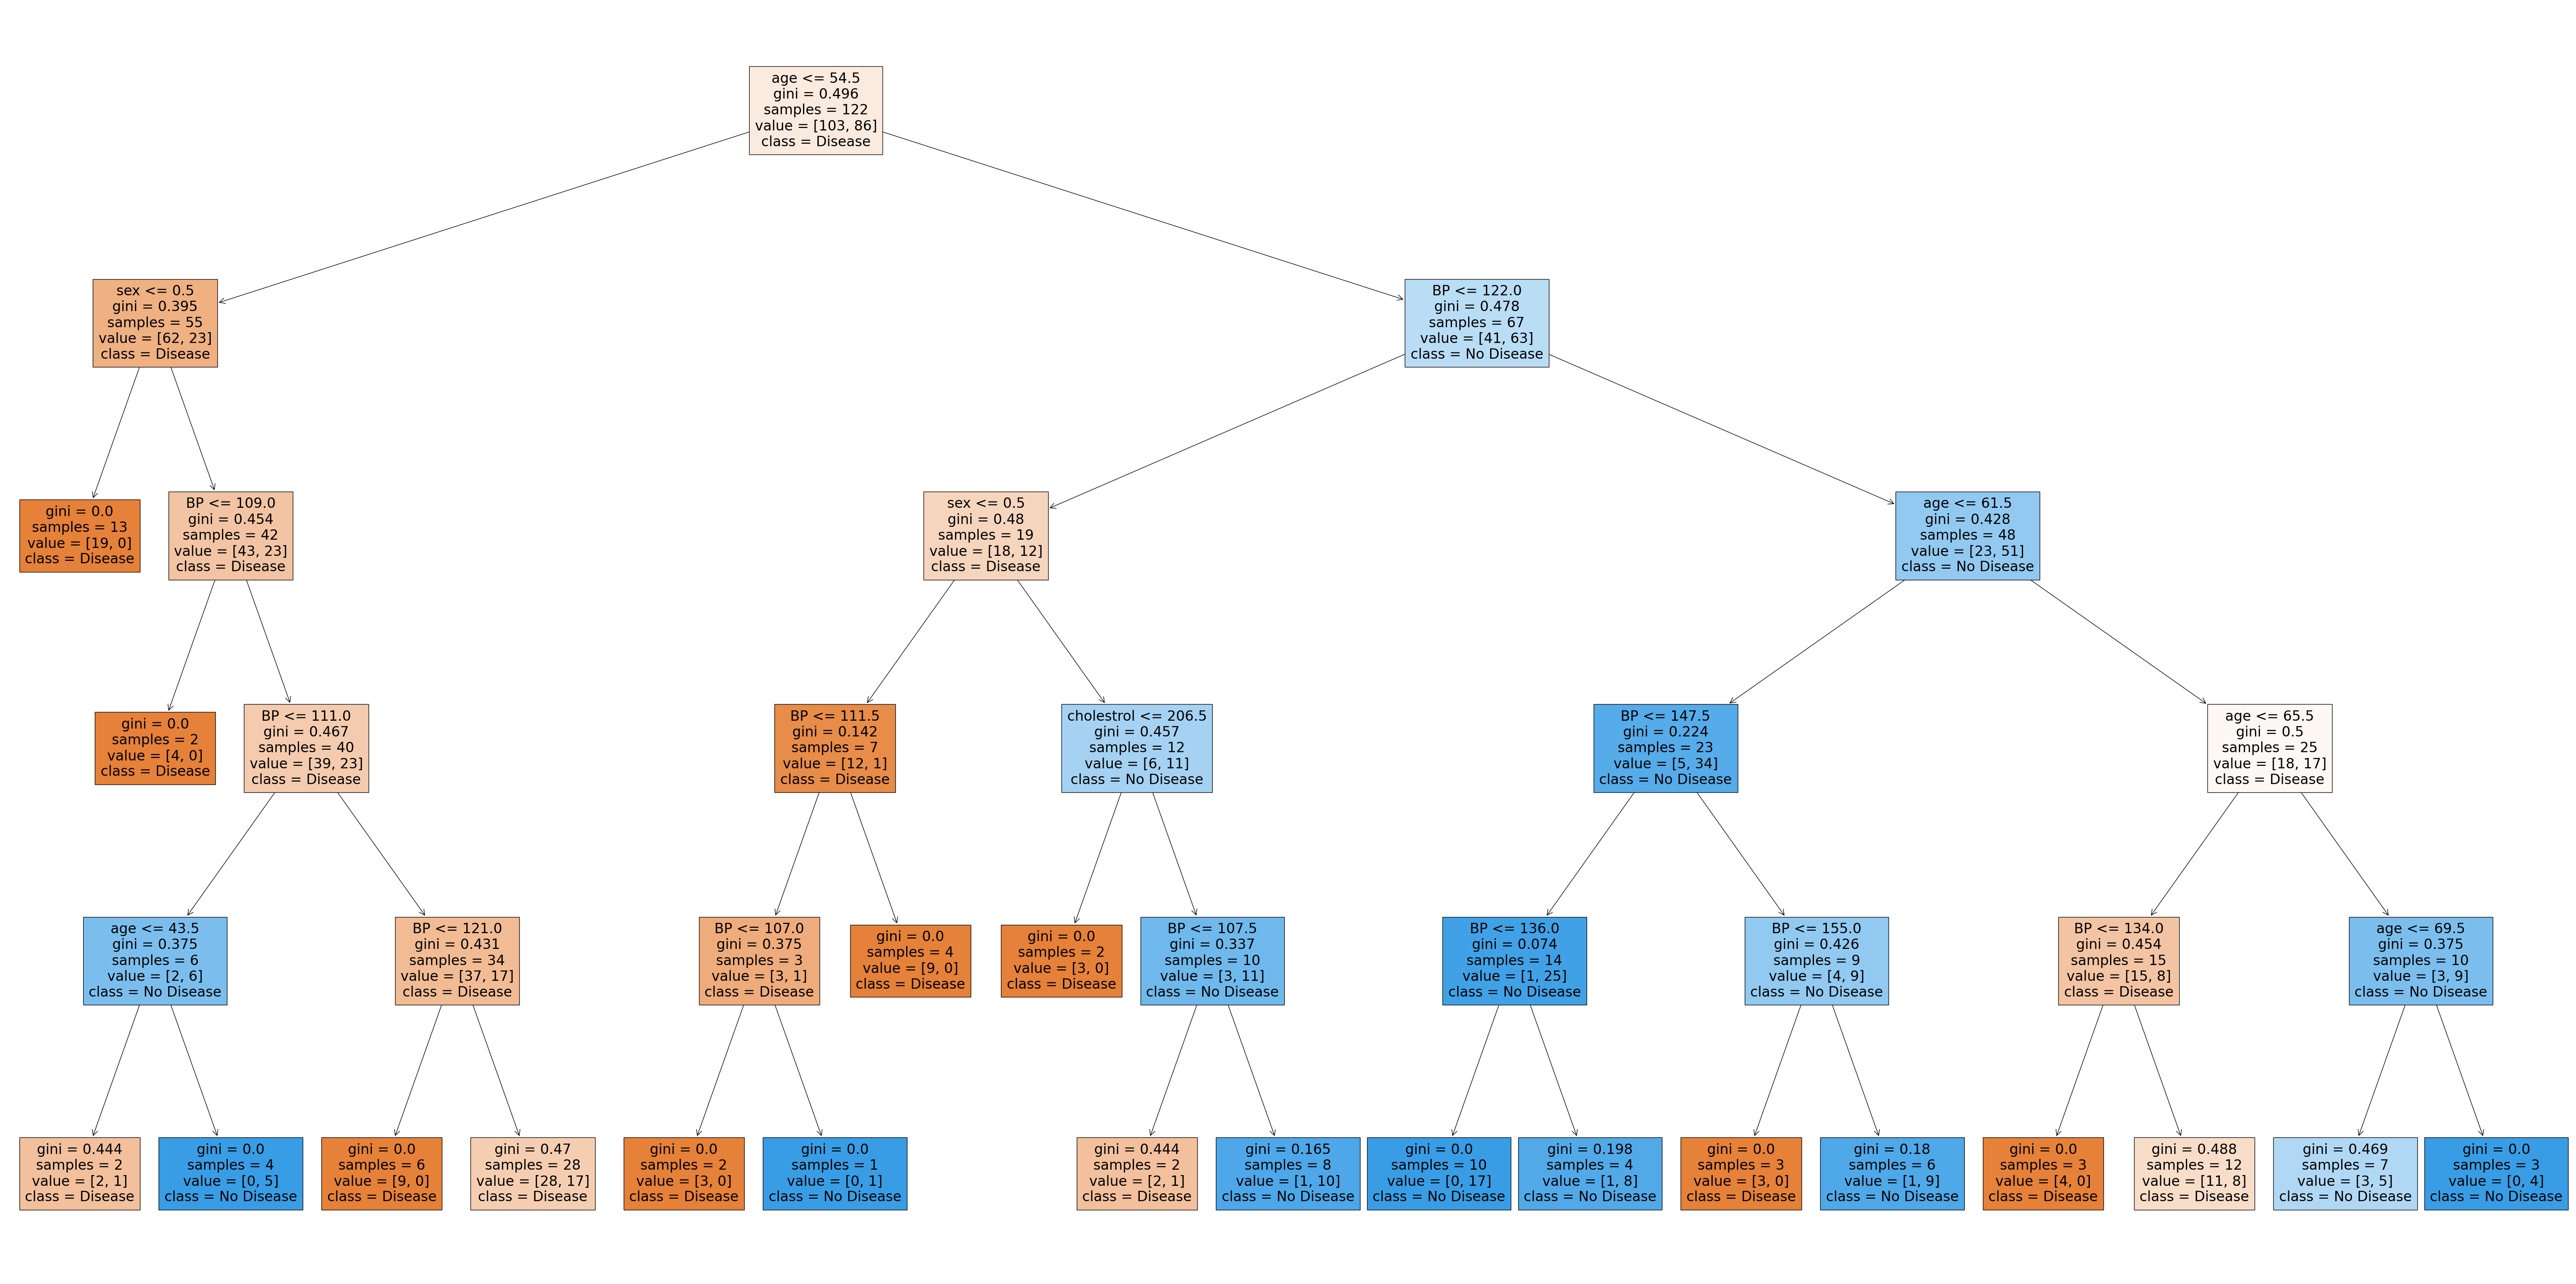

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[7], feature_names=list(X.columns), class_names=['Disease', 'No Disease'], filled=True)
plt.show()


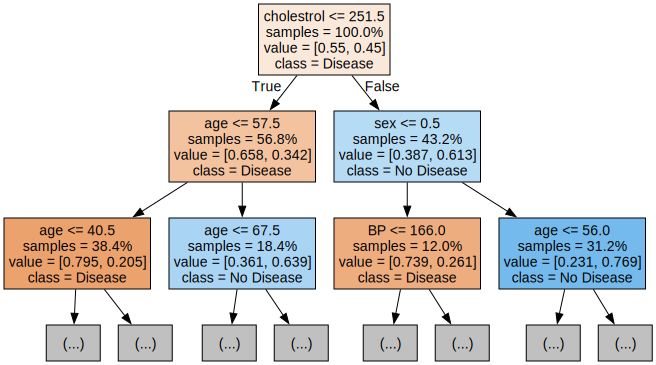

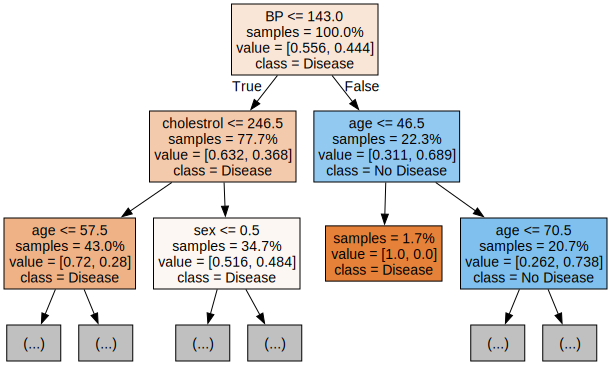

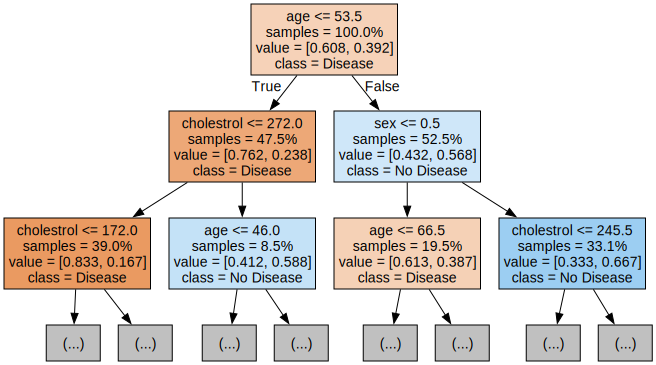

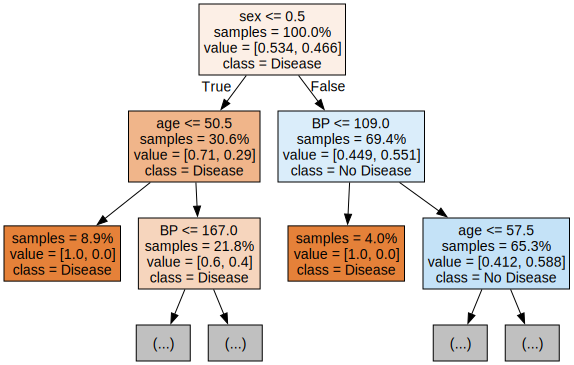

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

for i in range(4):
    tree = classifier_rf.estimators_[i]
    dot_data = export_graphviz(
        tree,
        feature_names=list(X_train.columns),
        class_names=['Disease', 'No Disease'],
        filled=True,
        max_depth=2,
        impurity=False,
        proportion=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)
